In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/Users/juliannawang/Desktop/archive/2022/heart_2022_no_nans.csv', usecols=[
    'State','HadHeartAttack','HadAngina','HadStroke',
    'HadAsthma','HadSkinCancer','HadCOPD','HadDepressiveDisorder','HadKidneyDisease','HadArthritis','HadDiabetes',
    'SmokerStatus','ECigaretteUsage','AlcoholDrinkers','DeafOrHardOfHearing',
    'BlindOrVisionDifficulty'])
data.head()

,State,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,SmokerStatus,ECigaretteUsage,AlcoholDrinkers
0,Alabama,No,No,No,No,No,No,No,No,Yes,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No
1,Alabama,No,No,No,No,No,No,No,No,Yes,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,No
2,Alabama,No,No,No,No,No,No,No,No,Yes,No,No,Yes,Former smoker,Never used e-cigarettes in my entire life,Yes
3,Alabama,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No
4,Alabama,No,No,No,No,No,No,No,No,Yes,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No


# Question 
For each state, is there a correlation between other health conditions (diabetes, asthma, arthritis, kidney disease, etc.) and having a heart condition? (heart attack, angina)

In [4]:
#How many respondents per State
grouped_data = data.groupby('State')
state_counts = grouped_data.size()
state_counts

State
Alabama                  1902
Alaska                   3205
Arizona                  5462
Arkansas                 2940
California               5096
Colorado                 5159
Connecticut              5053
Delaware                 2155
District of Columbia     1725
Florida                  7315
Georgia                  4978
Guam                     1549
Hawaii                   5596
Idaho                    3468
Illinois                 2607
Indiana                  5502
Iowa                     5672
Kansas                   6145
Kentucky                 2413
Louisiana                3010
Maine                    6013
Maryland                 9165
Massachusetts            5465
Michigan                 5370
Minnesota                9161
Mississippi              2438
Missouri                 4195
Montana                  4264
Nebraska                 5107
Nevada                   1769
New Hampshire            3756
New Jersey               3967
New Mexico               2968
New 

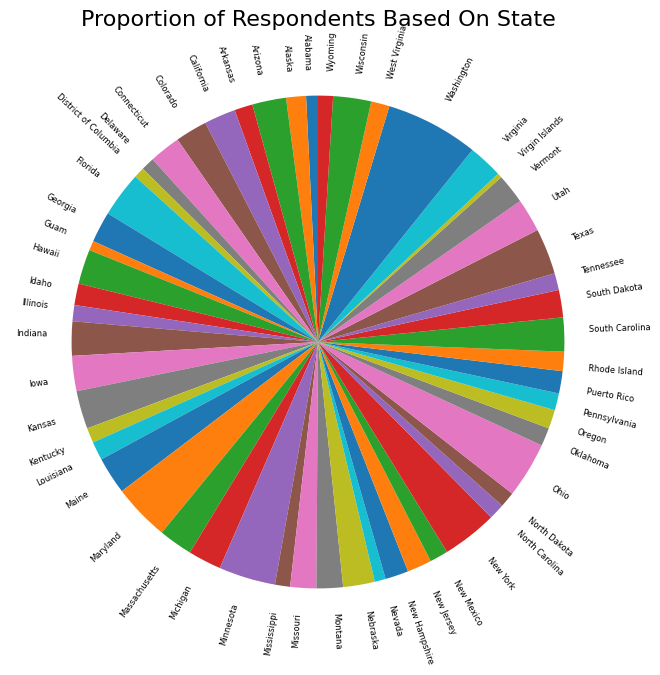

In [5]:
#Pie Chart of Proportion of Responses per State
plt.figure(figsize=(12, 8))
plt.pie(state_counts, labels=state_counts.index, startangle=90, textprops={'fontsize': 6},
        rotatelabels = True)
plt.title('Proportion of Respondents Based On State', fontsize=16)

plt.show()

In [6]:
#Mapping Responses 

#never/no responses: 0 
#former/used to/sometimes/conditional yes: 0.5
#current/yes/ongoing: 1 

smoker_mapping = {'Current smoker - now smokes every day': 1, 'Current smoker - now smokes some days': 1, 'Former smoker': 0.5, 'Never smoked': 0}
ecig_mapping = {'Use them every day': 1, 'Not at all (right now)': 0.5, 'Use them some days': 0.5,
                'Never used e-cigarettes in my entire life': 0}
diabetes_mapping = {'Yes': 1, 'Yes, but only during pregnancy (female)': 0.5, 
                    'No': 0, 'No, pre-diabetes or borderline diabetes': 0}


data['SmokerStatus'] = data['SmokerStatus'].replace(smoker_mapping)
data['ECigaretteUsage'] = data['ECigaretteUsage'].replace(ecig_mapping)
data['HadDiabetes'] = data['HadDiabetes'].replace(diabetes_mapping)

yes_no_response_columns = ['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 
                           'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 
                           'BlindOrVisionDifficulty', 'AlcoholDrinkers']

data[yes_no_response_columns] = data[yes_no_response_columns].replace({'Yes': 1, 'No': 0})

In [9]:
#Corr of HadHeartAttack and Health Conditions 
correlation_columns = ['HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
                        'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'SmokerStatus', 
                        'ECigaretteUsage', 'AlcoholDrinkers', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty']

correlation_heartattack = data.groupby('State')[correlation_columns + ['HadHeartAttack']].apply(lambda x: x.corr().loc['HadHeartAttack', :]) 
print("Correlation for each state:")
print(correlation_heartattack)

Correlation for each state:
HadHeartAttack        HadStroke  HadAsthma  HadSkinCancer   HadCOPD  \
State                                                                 
Alabama                0.128678   0.009352       0.052317  0.062687   
Alaska                 0.206884   0.046865       0.083464  0.190094   
Arizona                0.217334   0.016345       0.040446  0.151904   
Arkansas               0.156851   0.060402       0.051300  0.183664   
California             0.177570   0.040895       0.027366  0.137021   
Colorado               0.110164   0.033955       0.071261  0.140968   
Connecticut            0.158959   0.005509       0.025979  0.069938   
Delaware               0.077151   0.012669       0.079727  0.089494   
District of Columbia   0.235418   0.002463       0.023293  0.074133   
Florida                0.213515   0.024286       0.076911  0.138390   
Georgia                0.199918   0.020016       0.046522  0.139148   
Guam                   0.139972   0.040043       

In [10]:
#Corr of HadAngina and Health Conditions 
correlation_angina = data.groupby('State')[correlation_columns + ['HadAngina']].apply(lambda x: x.corr().loc['HadAngina', :])
print("Correlation for each state:")
print(correlation_angina)

Correlation for each state:
HadAngina             HadStroke  HadAsthma  HadSkinCancer   HadCOPD  \
State                                                                 
Alabama                0.161996   0.065240       0.099548  0.154602   
Alaska                 0.214891   0.057638       0.056451  0.169295   
Arizona                0.148954   0.050072       0.070056  0.136794   
Arkansas               0.138925   0.059133       0.101406  0.201017   
California             0.157516   0.022922       0.105341  0.175654   
Colorado               0.080022   0.039278       0.074388  0.153577   
Connecticut            0.154764   0.009406       0.063423  0.122568   
Delaware               0.103685   0.047387       0.082633  0.184161   
District of Columbia   0.163513  -0.000363       0.048639  0.100357   
Florida                0.175221   0.045655       0.108890  0.180305   
Georgia                0.161949   0.050136       0.086193  0.152958   
Guam                   0.169159  -0.016781       

In [11]:
#For each state, the Health Condition with the highest Correlation with HadHeartAttack
state_heartattack = data.groupby('State')[correlation_columns + ['HadHeartAttack']].apply(lambda x: x.corr().loc['HadHeartAttack', :].drop('HadHeartAttack').idxmax())
state_heartattack

State
Alabama                             HadDiabetes
Alaska                                HadStroke
Arizona                               HadStroke
Arkansas                                HadCOPD
California                            HadStroke
Colorado                                HadCOPD
Connecticut                           HadStroke
Delaware                BlindOrVisionDifficulty
District of Columbia                  HadStroke
Florida                               HadStroke
Georgia                               HadStroke
Guam                                  HadStroke
Hawaii                                HadStroke
Idaho                                 HadStroke
Illinois                              HadStroke
Indiana                               HadStroke
Iowa                                HadDiabetes
Kansas                                HadStroke
Kentucky                              HadStroke
Louisiana                               HadCOPD
Maine                             

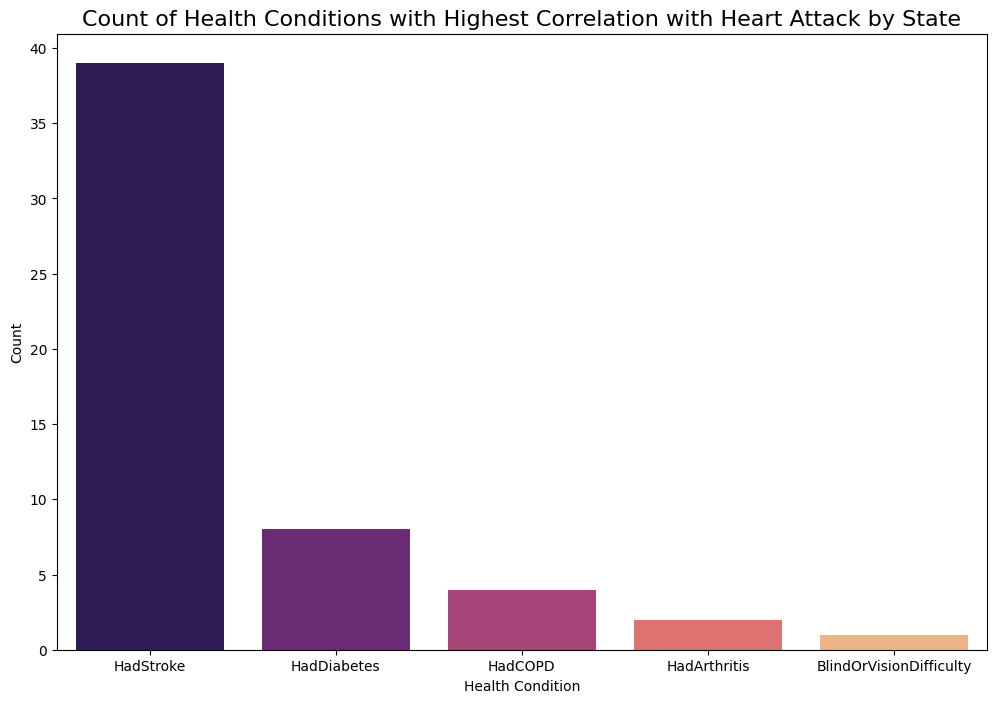

In [12]:
#State HeartAttack Graph
counts = state_heartattack.value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=counts.index, y=counts.values, palette='magma')
plt.title('Count of Health Conditions with Highest Correlation with Heart Attack by State', fontsize=16)
plt.xlabel('Health Condition')
plt.ylabel('Count')
plt.show()

In [13]:
#For each state, the Health Condition with the highest Correlation with HadAngina
state_angina = data.groupby('State')[correlation_columns + ['HadAngina']].apply(lambda x: x.corr().loc['HadAngina', :].drop('HadAngina').idxmax())
state_angina

State
Alabama                         HadDiabetes
Alaska                            HadStroke
Arizona                    HadKidneyDisease
Arkansas                            HadCOPD
California                          HadCOPD
Colorado                            HadCOPD
Connecticut                HadKidneyDisease
Delaware                   HadKidneyDisease
District of Columbia       HadKidneyDisease
Florida                             HadCOPD
Georgia                           HadStroke
Guam                            HadDiabetes
Hawaii                            HadStroke
Idaho                      HadKidneyDisease
Illinois                        HadDiabetes
Indiana                             HadCOPD
Iowa                            HadDiabetes
Kansas                          HadDiabetes
Kentucky                            HadCOPD
Louisiana                           HadCOPD
Maine                             HadStroke
Maryland                          HadStroke
Massachusetts             

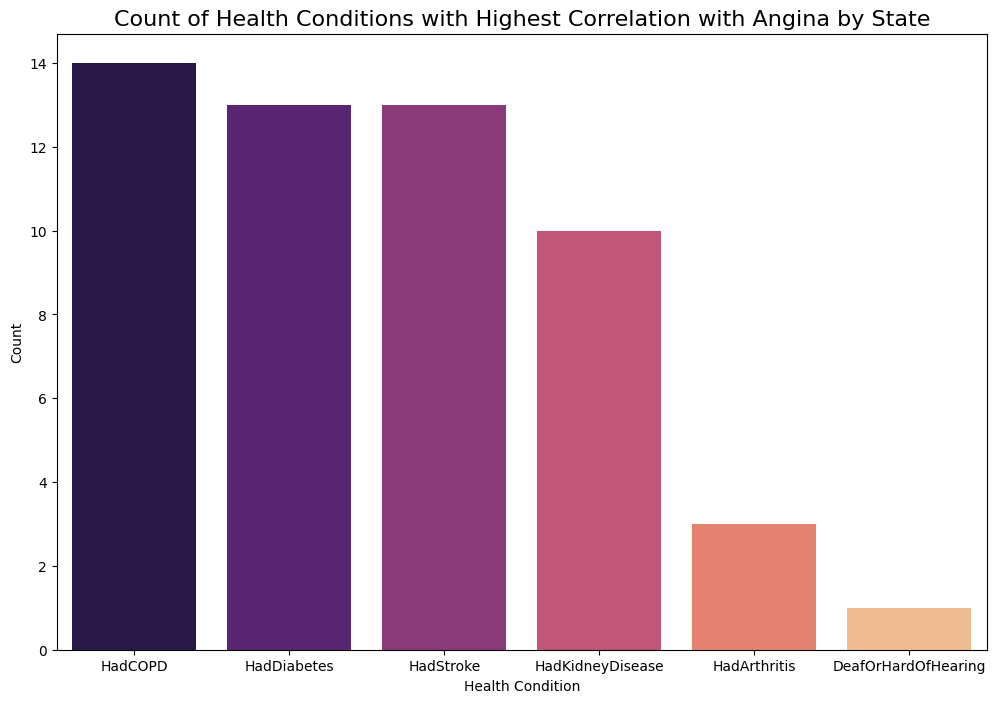

In [14]:
#State_Angina Graph 
counts = state_angina.value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=counts.index, y=counts.values, palette='magma')
plt.title('Count of Health Conditions with Highest Correlation with Angina by State', fontsize=16)
plt.xlabel('Health Condition')
plt.ylabel('Count')
plt.show()

In [15]:
#Print out all the states/territories present in the .csv
unique_states = data['State'].unique()
unique_states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Guam', 'Puerto Rico',
       'Virgin Islands'], dtype=object)

In [16]:
#Mapping States to Regions
state_to_region = {'Alabama': 'Southeast', 'Alaska': 'West', 'Arizona': 'West', 'Arkansas': 'Southeast',
    'California': 'West', 'Colorado': 'West', 'Connecticut': 'Northeast', 'Delaware': 'Northeast', 
    'District of Columbia': 'Northeast', 'Florida': 'Southeast', 'Georgia': 'Southeast', 'Hawaii': 'West',
    'Idaho': 'West', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest',
    'Kentucky': 'Southeast', 'Louisiana': 'Southeast', 'Maine': 'Northeast', 'Maryland': 'Northeast',
    'Massachusetts': 'Northeast', 'Michigan': 'Midwest', 'Minnesota': 'Midwest', 'Mississippi': 'Southeast',
    'Missouri': 'Midwest', 'Montana': 'West', 'Nebraska': 'Midwest', 'Nevada': 'West', 'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast', 'New Mexico': 'West', 'New York': 'Northeast', 'North Carolina': 'Southeast',
    'North Dakota': 'Midwest', 'Ohio': 'Midwest', 'Oklahoma': 'Southeast', 'Oregon': 'West',
    'Pennsylvania': 'Northeast', 'Rhode Island': 'Northeast', 'South Carolina': 'Southeast', 
    'South Dakota': 'Midwest', 'Tennessee': 'Southeast', 'Texas': 'Southeast', 'Utah': 'West', 'Vermont': 'Northeast',
    'Virginia': 'Southeast', 'Washington': 'West', 'West Virginia': 'Southeast', 'Wisconsin': 'Midwest',
    'Wyoming': 'West', 'Guam': 'US Territory', 'Puerto Rico': 'US Territory', 'Virgin Islands': 'US Territory'}

data['Region'] = data['State'].map(state_to_region)

In [17]:
#Highest Correlation with Heart Attack based on Region
region_heartattack = data.groupby('Region')[correlation_columns + ['HadHeartAttack']].apply(lambda x: x.corr().loc['HadHeartAttack', :].drop('HadHeartAttack').idxmax())
region_heartattack

Region
Midwest         HadStroke
Northeast       HadStroke
Southeast       HadStroke
US Territory    HadStroke
West            HadStroke
dtype: object

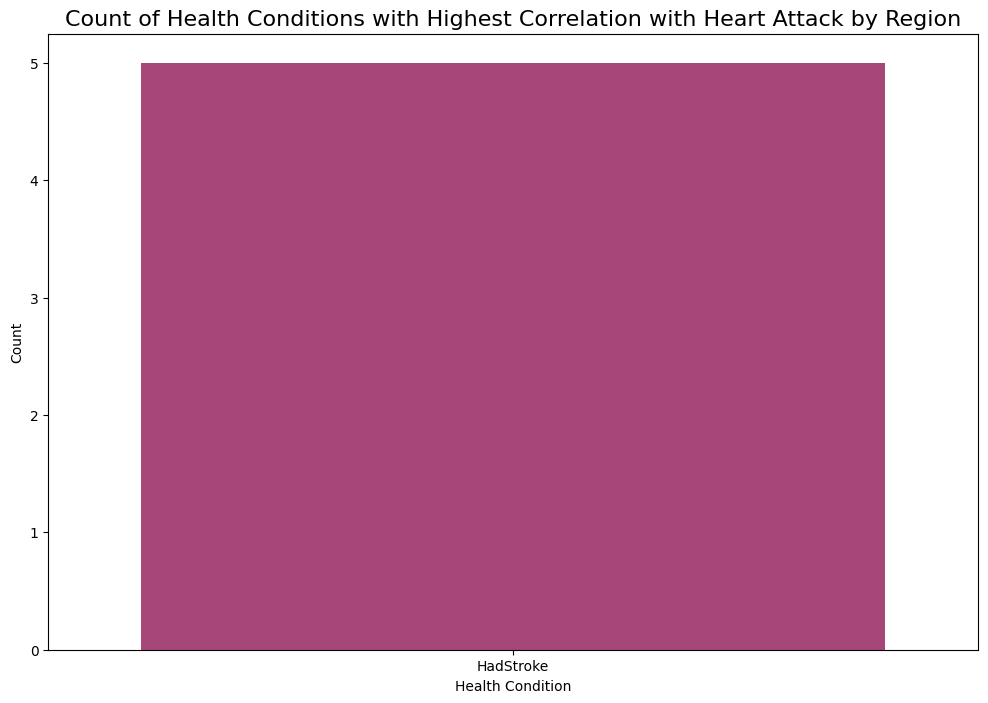

In [18]:
#Region_Heartattack Graph
counts = region_heartattack.value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=counts.index, y=counts.values, palette='magma')
plt.title('Count of Health Conditions with Highest Correlation with Heart Attack by Region', fontsize=16)
plt.xlabel('Health Condition')
plt.ylabel('Count')
plt.show()

In [19]:
#Highest Correlation with Angina based on Region 
region_angina = data.groupby('Region')[correlation_columns + ['HadAngina']].apply(lambda x: x.corr().loc['HadAngina', :].drop('HadAngina').idxmax())
region_angina

Region
Midwest              HadCOPD
Northeast        HadDiabetes
Southeast            HadCOPD
US Territory    HadArthritis
West               HadStroke
dtype: object

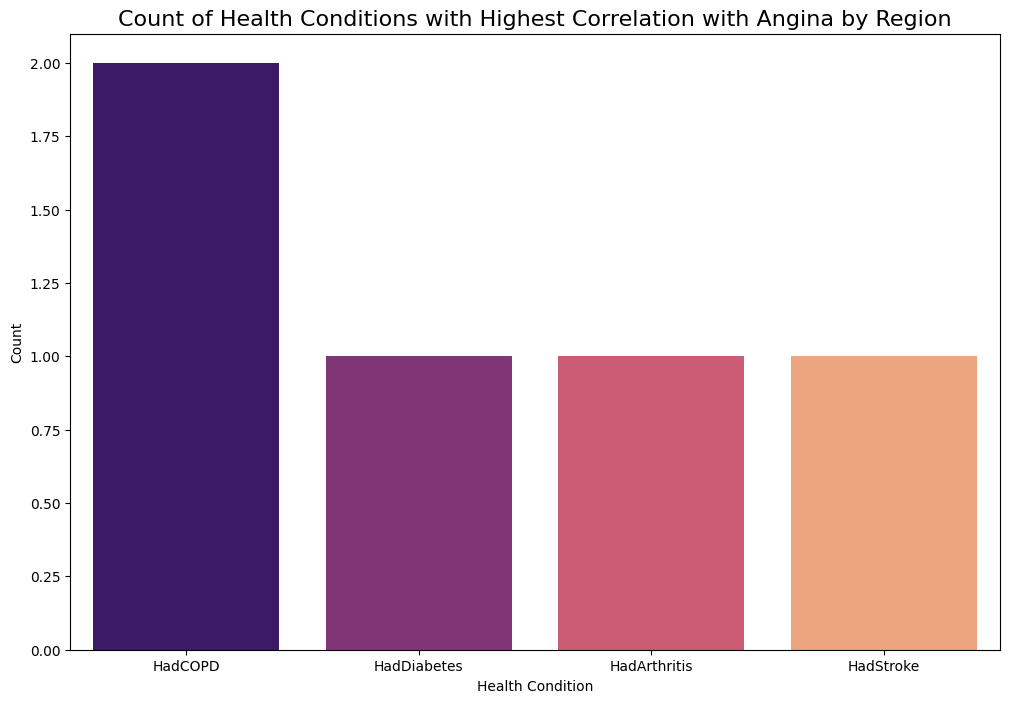

In [20]:
#Region_Angina Graph
counts = region_angina.value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=counts.index, y=counts.values, palette='magma')
plt.title('Count of Health Conditions with Highest Correlation with Angina by Region', fontsize=16)
plt.xlabel('Health Condition')
plt.ylabel('Count')
plt.show()